### Stephen Coates
### Final Project - Gym Exercise Data Analysis
December 12, 2024

### Dataset chosen - gym_members_exercise_tracking - https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data

### Questions to be answered - 

1) Does the data suggest any further targeting by demographic, gender or age or workout type interest
2) What percentage of members are doing cardio workouts in Heart Rate Zone 2?
2) Are there outliers with max heart rates potentially in a danger zone that should be reviewed by gym?
3) Which activity type burns the most calories?
4) Does gender or age suggest workout type, frequency of sessions or session time?



Notebooks I reviewed on Kaggle

https://www.kaggle.com/code/bhatnagardaksh/optimizing-gym-membership-engagement

https://www.kaggle.com/code/priyanshu594/analysis-on-exercise-dataset/notebook


## Exploring the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import numpy as np
# from sklearn import preprocessing
# %matplotlib inline
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# so i can see all comumns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# df=pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')
df=pd.read_csv('gym_members_exercise_tracking.csv')
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [4]:
# are there any null values
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [6]:
n_rows, n_cols =  df.shape
print(f"There are {n_rows} rows and {n_cols} columns in the gym member exercise dataset.")

There are 973 rows and 15 columns in the gym member exercise dataset.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [8]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.68,12.18,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.85,21.21,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.72,0.13,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.88,11.53,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.77,14.35,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.22,7.33,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.26,0.34,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.42,272.64,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.98,6.26,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.63,0.60,1.50,2.20,2.60,3.10,3.70


In [9]:
df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [11]:
df['Experience_Level'].value_counts()

Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

### Add some codes for gender and workout type
### Add the heart rate zone hr to help identify outliers
### Add description for BMI to aid understanding

Create age bins (copied from Kaggle contributor)

In [12]:
# add age bin categories for possible charting later on
# There is no one over 60 or under 18

age_bins = [0, 24, 35, 45, 60]
labels = ['18 - 24', '25 - 35', '36 - 45', '46 - 60']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=labels, right=False)



In [13]:
# add column to provide description of BMI

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_desc'] = df['BMI'].apply(categorize_bmi)

# add column to identify what zone the average and maximum heart rates are in
karvonnen calc code below


In [14]:
# this definition is the karvonnen method which is generally accepted as a better gauge of hr activity

def calculate_heart_rate_zones(age, resting_hr):
    max_hr = 220 - age
    heart_rate_reserve = max_hr - resting_hr
    
    return {
        'Zone 1': (resting_hr + (heart_rate_reserve * 0.50), resting_hr + (heart_rate_reserve * 0.60)),
        'Zone 2': (resting_hr + (heart_rate_reserve * 0.60), resting_hr + (heart_rate_reserve * 0.70)),
        'Zone 3': (resting_hr + (heart_rate_reserve * 0.70), resting_hr + (heart_rate_reserve * 0.80)),
        'Zone 4': (resting_hr + (heart_rate_reserve * 0.80), resting_hr + (heart_rate_reserve * 0.90)),
        'Zone 5': (resting_hr + (heart_rate_reserve * 0.90), resting_hr + (heart_rate_reserve * 1))
    }

def determine_workout_zone(avg_hr, zones):
    for zone, (lower, upper) in zones.items():
        if lower <= avg_hr < upper:
            return zone
    return 'Zone+'

df['Max_Heart_Rate'] = 220 - df['Age']
df['Heart_Rate_Zones'] = df.apply(lambda row: calculate_heart_rate_zones(row['Age'], row['Resting_BPM']), axis=1)
df['Avg_Workout_Zone'] = df.apply(lambda row: determine_workout_zone(row['Avg_BPM'], row['Heart_Rate_Zones']), axis=1)
df['Max_Workout_Zone'] = df.apply(lambda row: determine_workout_zone(row['Max_BPM'], row['Heart_Rate_Zones']), axis=1)

In [15]:
# converted because I understand lbs and inches better
df['Weight (lbs)'] =  (df['Weight (kg)'] * 2.2).round(1)
df['Height (in)'] =  (df['Height (m)'] * 39.37).round(1)

In [16]:
changes_G = {'Male': 'M', 'Female': 'F'}

In [17]:
df['Gender'] = df['Gender'].map(changes_G)

In [18]:
changes_WT = {'Cardio':0, 'Yoga':1, 'HIIT':2, 'Strength': 3}

In [19]:
df['Workout_Code'] = df['Workout_Type'].map(changes_WT)

In [20]:
# check the BMI value in file
df['BMI calc'] = df['Weight (kg)']/df['Height (m)']**2

# looks like BMI field is good, I checked because of the 12.6% fat on first person in table didn't gel with a BMI of 30, (I can't validate the fat %)

In [21]:
# adding a calories burned per hour field 

df['Cal_per_Hr'] = df['Calories_Burned']/df['Session_Duration (hours)']

In [22]:
# The outside zone value of the zone field may be enough but creating a boolean in case it helps the charting
df['Above_Zone5'] = df.apply(lambda row: row['Max_BPM'] > row['Heart_Rate_Zones']['Zone 5'][1], axis=1)

In [23]:
df.Above_Zone5.value_counts()

Above_Zone5
False    539
True     434
Name: count, dtype: int64

In [24]:
df.sample(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_Group,BMI_desc,Max_Heart_Rate,Heart_Rate_Zones,Avg_Workout_Zone,Max_Workout_Zone,Weight (lbs),Height (in),Workout_Code,BMI calc,Cal_per_Hr,Above_Zone5
697,56,M,93.6,1.66,177,151,52,1.37,1024.0,Strength,29.0,2.2,2,1,33.97,46 - 60,Obese,164,"{'Zone 1': (108.0, 119.2), 'Zone 2': (119.2, 1...",Zone 4,Zone+,205.9,65.4,3,33.967194,747.445255,True
545,29,F,54.9,1.52,172,123,72,1.48,910.0,Strength,27.0,2.0,3,1,23.76,25 - 35,Normal weight,191,"{'Zone 1': (131.5, 143.39999999999998), 'Zone ...",Zone+,Zone 4,120.8,59.8,3,23.762119,614.864865,False
582,37,M,76.3,1.77,180,128,57,1.36,957.0,HIIT,27.3,2.1,4,2,24.35,36 - 45,Normal weight,183,"{'Zone 1': (120.0, 132.6), 'Zone 2': (132.6, 1...",Zone 1,Zone 5,167.9,69.7,2,24.354432,703.676471,False
31,20,F,65.4,1.52,185,127,50,1.03,654.0,Yoga,28.0,2.2,4,2,28.31,18 - 24,Overweight,200,"{'Zone 1': (125.0, 140.0), 'Zone 2': (140.0, 1...",Zone 1,Zone 5,143.9,59.8,1,28.306787,634.951456,False
231,45,F,44.5,1.65,162,148,71,1.44,959.0,Yoga,30.7,1.6,3,1,16.35,46 - 60,Underweight,175,"{'Zone 1': (123.0, 133.4), 'Zone 2': (133.4, 1...",Zone 3,Zone 4,97.9,65.0,1,16.345271,665.972222,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            973 non-null    int64   
 1   Gender                         973 non-null    object  
 2   Weight (kg)                    973 non-null    float64 
 3   Height (m)                     973 non-null    float64 
 4   Max_BPM                        973 non-null    int64   
 5   Avg_BPM                        973 non-null    int64   
 6   Resting_BPM                    973 non-null    int64   
 7   Session_Duration (hours)       973 non-null    float64 
 8   Calories_Burned                973 non-null    float64 
 9   Workout_Type                   973 non-null    object  
 10  Fat_Percentage                 973 non-null    float64 
 11  Water_Intake (liters)          973 non-null    float64 
 12  Workout_Frequency (days/week)  973 n

### Data appears sufficient, clean and reasonable for the analysis

## Question 1 - does any of the demographic data assist the gym in identifying what client to market too?

## Demographic pie charts to show who is working out

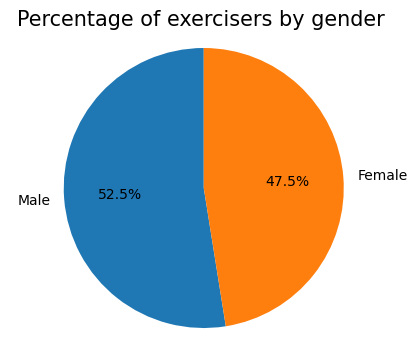

In [26]:
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 4))
plt.pie(gender_counts.values, 
#        labels=gender_counts.index,
        labels=['Male', 'Female'],
        autopct='%1.1f%%',  # Show percentage on the chart
        startangle=90)      # Start the first slice at the top

plt.title('Percentage of exercisers by gender ', fontsize=15)
plt.axis('equal') 

plt.show()

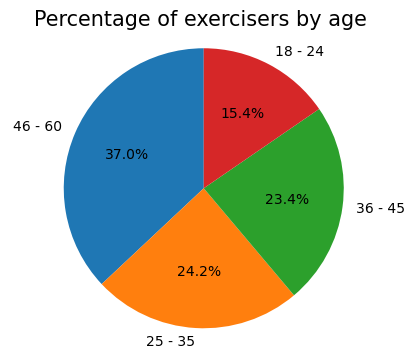

In [27]:
age_groups = df['Age_Group'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 4))
plt.pie(age_groups.values, 
        labels=age_groups.index, 
        autopct='%1.1f%%',  # Show percentage on the chart
        startangle=90)      # Start the first slice at the top

plt.title('Percentage of exercisers by age ', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

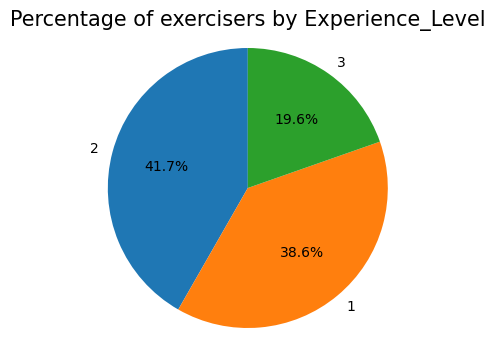

In [28]:
exp_level = df['Experience_Level'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 4))
plt.pie(exp_level.values, 
        labels=exp_level.index, 
        autopct='%1.1f%%',  # Show percentage on the chart
        startangle=90)      # Start the first slice at the top

plt.title('Percentage of exercisers by Experience_Level', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

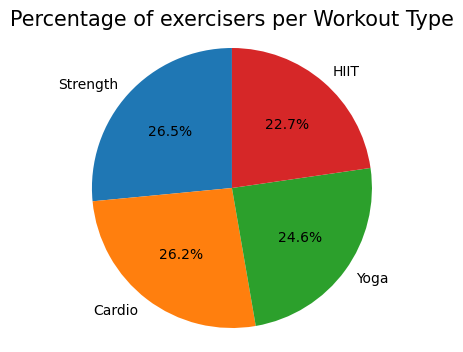

In [29]:
workout_types = df['Workout_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 4))
plt.pie(workout_types.values, 
        labels=workout_types.index, 
        autopct='%1.1f%%',  # Show percentage on the chart
        startangle=90)      # Start the first slice at the top

plt.title('Percentage of exercisers per Workout Type', fontsize=15)
plt.axis('equal')  
plt.show()

<Axes: xlabel='Workout_Type', ylabel='percent'>

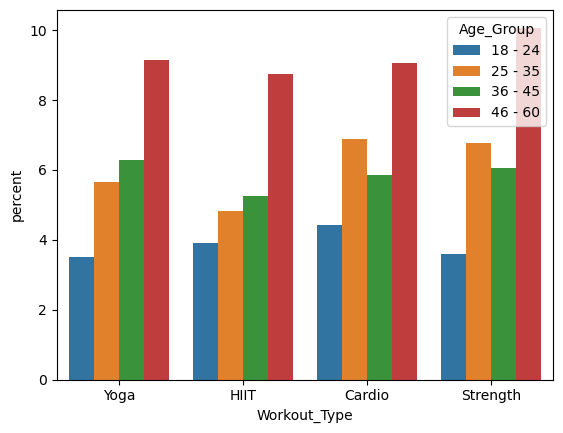

In [30]:
sns.countplot(x = 'Workout_Type', data=df, hue = 'Age_Group', stat='percent')

<Axes: xlabel='Workout_Type', ylabel='count'>

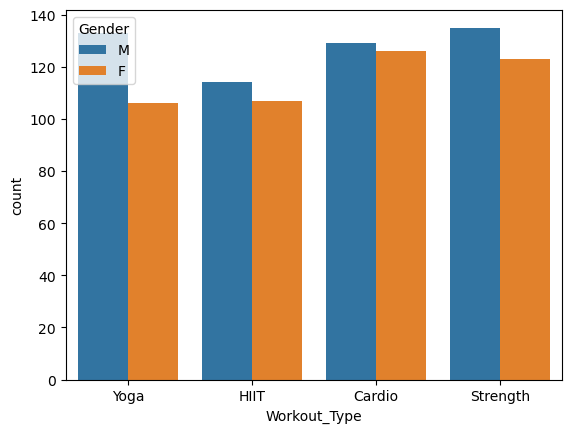

In [31]:
sns.countplot(x = 'Workout_Type', data=df, hue = 'Gender')

## What do the demographic charts suggest when trying to increase membership
No niche market is significant. The older age group is the largest, perhaps also the most able to pay for personal services.
Are they trying to be all things to all people?
Normally a small business should have an ideal customer - perhaps define one and target them.
Possibly survey data of clients who re-signup and an exit survey for those that don't could help focus

### The plot below shows that all fitness levels seem to participate across all 4 workout types
I was not sure what i expected but for instance I didn't think that obese clients would go for HIIT classes
### This does not help guide a choice for focusing the gym's niche marketing

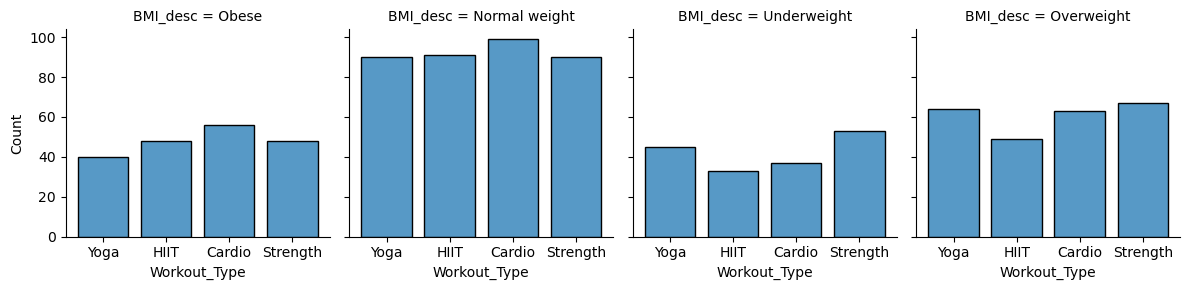

In [32]:
b = sns.FacetGrid(df, col='BMI_desc')
b.map_dataframe(sns.histplot, 'Workout_Type', shrink = 0.8)

## Question 2 - What percentage of cardio clients have an average bpm in zone 2 which is the current recommendation?

In [34]:
df_cardio = df[df.Workout_Type.isin(['Cardio'])]
df_cardio

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_Group,BMI_desc,Max_Heart_Rate,Heart_Rate_Zones,Avg_Workout_Zone,Max_Workout_Zone,Weight (lbs),Height (in),Workout_Code,BMI calc,Cal_per_Hr,Above_Zone5
2,32,F,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,25 - 35,Normal weight,188,"{'Zone 1': (121.0, 134.39999999999998), 'Zone ...",Zone 1,Zone 4,149.8,65.4,0,24.713311,609.909910,False
6,36,M,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76,36 - 45,Normal weight,184,"{'Zone 1': (128.5, 139.6), 'Zone 2': (139.6, 1...",Zone 4,Zone 5,154.7,67.7,0,23.762845,929.530201,False
7,40,F,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57,36 - 45,Obese,180,"{'Zone 1': (122.0, 133.6), 'Zone 2': (133.6, 1...",Zone 2,Zone+,153.3,59.4,0,30.568835,704.724409,True
9,28,M,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07,25 - 35,Obese,192,"{'Zone 1': (128.0, 140.8), 'Zone 2': (140.8, 1...",Zone 1,Zone 4,224.0,72.4,0,30.068526,748.148148,False
12,57,M,112.5,1.61,195,165,61,1.24,1013.0,Cardio,22.1,2.7,3,2,43.40,46 - 60,Obese,163,"{'Zone 1': (112.0, 122.19999999999999), 'Zone ...",Zone+,Zone+,247.5,63.4,0,43.401103,816.935484,True
17,41,F,43.8,1.77,182,165,58,1.19,884.0,Cardio,31.9,1.6,3,1,13.98,36 - 45,Underweight,179,"{'Zone 1': (118.5, 130.6), 'Zone 2': (130.6, 1...",Zone 4,Zone+,96.4,69.7,0,13.980657,742.857143,True
21,38,M,71.9,1.77,197,142,72,1.12,875.0,Cardio,25.7,3.1,2,1,22.95,36 - 45,Normal weight,182,"{'Zone 1': (127.0, 138.0), 'Zone 2': (138.0, 1...",Zone 2,Zone+,158.2,69.7,0,22.949982,781.250000,True
33,24,F,58.9,1.51,187,157,68,1.04,816.0,Cardio,31.7,2.5,2,1,25.83,25 - 35,Overweight,196,"{'Zone 1': (132.0, 144.8), 'Zone 2': (144.8, 1...",Zone 2,Zone 5,129.6,59.4,0,25.832200,784.615385,False
36,56,F,59.3,1.56,182,155,57,1.26,879.0,Cardio,33.4,2.6,4,2,24.37,46 - 60,Normal weight,164,"{'Zone 1': (110.5, 121.2), 'Zone 2': (121.2, 1...",Zone 5,Zone+,130.5,61.4,0,24.367193,697.619048,True
40,31,F,48.8,1.51,195,131,60,1.48,969.0,Cardio,28.2,2.0,2,1,21.40,25 - 35,Normal weight,189,"{'Zone 1': (124.5, 137.39999999999998), 'Zone ...",Zone 1,Zone+,107.4,59.4,0,21.402570,654.729730,True


In [35]:
df.Avg_Workout_Zone.value_counts().index

Index(['Zone 2', 'Zone 3', 'Zone 1', 'Zone 4', 'Zone+', 'Zone 5'], dtype='object', name='Avg_Workout_Zone')

In [37]:
# use this to help sort the order of the plots
sorted_zones = sorted(df_cardio['Avg_Workout_Zone'].unique())

<Axes: xlabel='Avg_Workout_Zone', ylabel='Percent'>

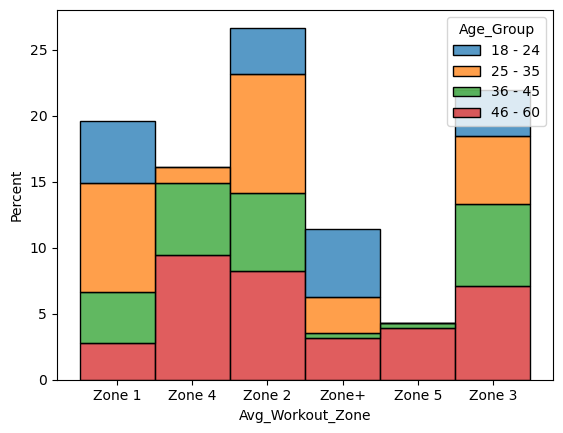

In [39]:
sns.histplot(x=df_cardio.Avg_Workout_Zone, hue=df_cardio.Age_Group, multiple='stack', stat='percent')

# i cannot use the order parameter even though it looks like it should work, it does work later on in other plots but I couldn't fix here

### Above plot shows that 27% of the people working out doing cardio have their average bpm in the optimal zone 2

Having people workout in zone 2 during cardio would be something for the trainers to monitor

## Question 3 - Outliers to review
### Max heart rate outliers
### Average bpm over zone 4
### Fat percentage and BMI related outliers

<Axes: xlabel='Fat_Percentage', ylabel='BMI'>

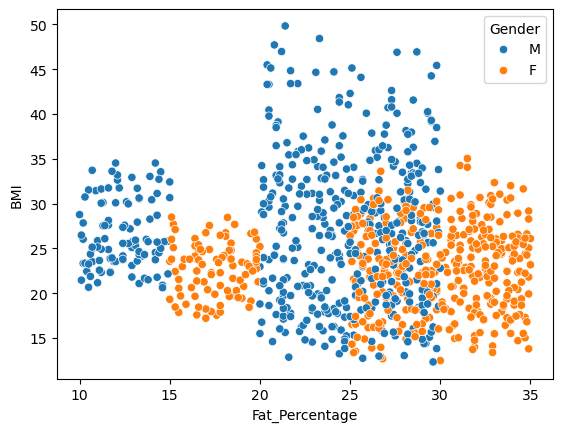

In [40]:
sns.scatterplot(x='Fat_Percentage', y = 'BMI', data=df, hue='Gender')

In [41]:
# create 2 subsets of data to get a short sample list of people to start the investigation process

df_body_metrics = df.iloc[:, [0, 1, 6, 10, 14, 15, 16, 17, 21, 22]]
df_body_metrics1 = df_body_metrics.query('BMI > 40 and Fat_Percentage < 22')
df_body_metrics2 = df_body_metrics.query('BMI < 15 and Fat_Percentage > 28')

In [42]:
print(df_body_metrics1[['Age', 'Gender', 'Fat_Percentage', 'BMI', 'BMI_desc', 'Weight (lbs)', 'Height (in)']])

     Age Gender  Fat_Percentage    BMI BMI_desc  Weight (lbs)  Height (in)
10    41      M            20.5  43.31    Obese         265.8         65.7
55    23      M            21.7  44.84    Obese         252.6         63.0
261   57      M            20.8  47.72    Obese         279.0         64.2
291   55      M            20.4  45.49    Obese         282.5         66.1
302   36      M            20.4  43.31    Obese         272.1         66.5
408   46      M            20.5  40.45    Obese         239.4         64.6
593   55      M            21.7  43.40    Obese         285.8         68.1
687   18      M            20.6  45.14    Obese         277.0         65.7
710   38      M            21.2  46.98    Obese         271.3         63.8
854   48      M            21.4  49.84    Obese         284.2         63.4


In [43]:
print(df_body_metrics2[['Age', 'Gender', 'Fat_Percentage', 'BMI', 'BMI_desc', 'Weight (lbs)', 'Height (in)']])

     Age Gender  Fat_Percentage    BMI     BMI_desc  Weight (lbs)  Height (in)
4     38      M            29.2  14.39  Underweight         101.4         70.5
17    41      F            31.9  13.98  Underweight          96.4         69.7
130   49      F            30.8  14.93  Underweight          99.4         68.5
156   56      F            30.0  12.47  Underweight          88.9         70.9
194   49      F            34.3  14.69  Underweight          88.0         65.0
282   24      F            31.8  13.71  Underweight          92.4         68.9
343   46      M            29.1  14.36  Underweight          99.0         69.7
401   42      F            32.9  14.10  Underweight          93.9         68.5
504   42      F            28.1  14.87  Underweight         102.5         69.7
537   31      F            34.9  13.78  Underweight          93.9         69.3
581   45      M            29.0  14.85  Underweight         115.5         74.0
586   56      M            29.8  13.81  Underweight 

### In order to produce a two sample lists for the powerpoint I restricted the parameters used in the selection criteria
### BMI > 40 and Fat_Percentage < 22 AND BMI < 15 and Fat_Percentage > 28

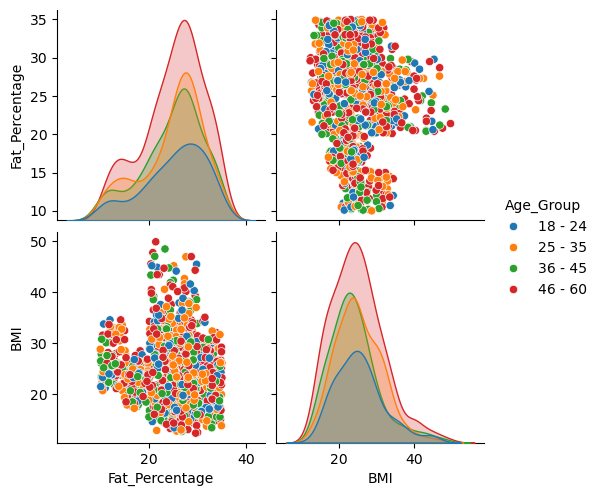

In [44]:
sns.pairplot(data=df, vars=['Fat_Percentage', 'BMI'], hue='Age_Group')

## Above comparing fat percetage and BMI by age group and below comparing by gender
### As clients age their BMI goes up
### Significant bunching occurs when by gender but i think the numbers are worth validating, less than 20 BMI and over 30% body fat or 20% body fat and with a BMI over 40 is suspicious

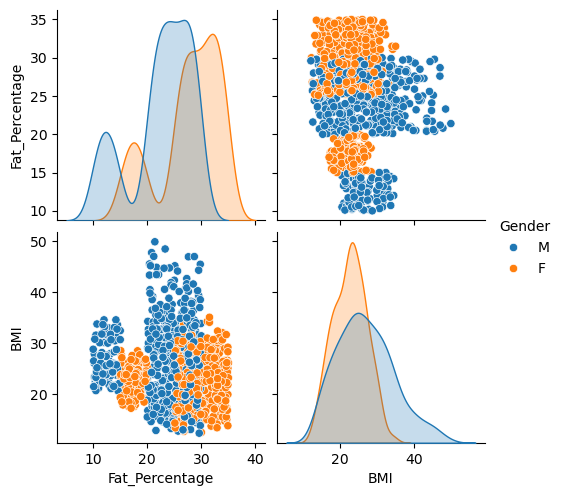

In [45]:
sns.pairplot(data=df, vars=['Fat_Percentage', 'BMI'], hue='Gender')

<Axes: xlabel='Max_Heart_Rate', ylabel='Max_BPM'>

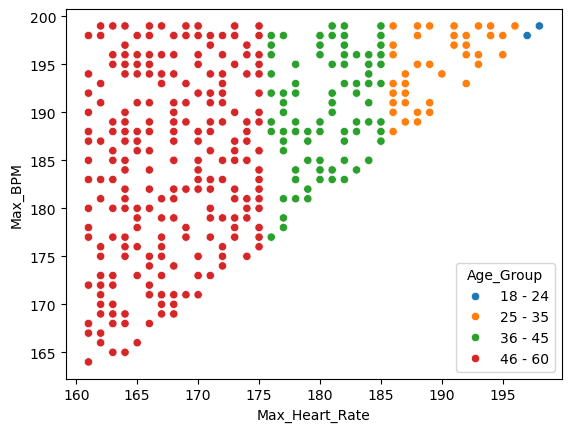

In [46]:
sns.scatterplot(x='Max_Heart_Rate', y = 'Max_BPM', data=df[df['Max_BPM'] > df['Max_Heart_Rate']], hue = 'Age_Group')

### This illustrates that older people regularly exceed their calculated max heart rate

<Axes: xlabel='Max_Heart_Rate', ylabel='Max_BPM'>

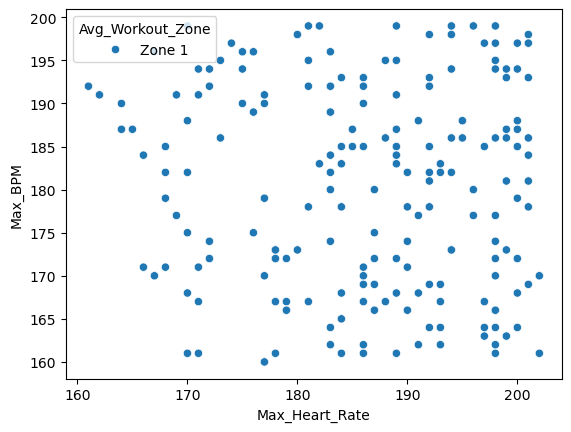

In [47]:
sns.scatterplot(x='Max_Heart_Rate', y = 'Max_BPM', data=df[df['Avg_Workout_Zone'] == 'Zone 1'], hue = 'Avg_Workout_Zone')

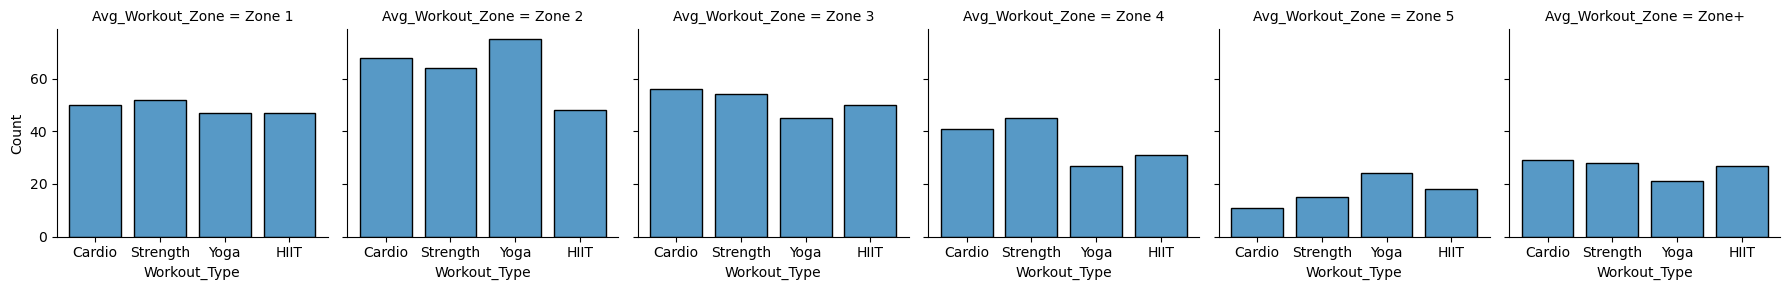

In [48]:
# sorted_zones = sorted(df['Avg_Workout_Zone'].unique())
w= sns.FacetGrid(df, col='Avg_Workout_Zone', col_order=sorted_zones)
w.map_dataframe(sns.histplot, 'Workout_Type', shrink = 0.8)

## The above plots suggest to me that there are issues collecting and measuring heart rates.
### For instance, yoga having the most people with a average bpm in zone 5 does not seem correct.

### Which activity burns the most calories

The boxplots show that Males(0) tend to burn more calories, but all workout types are similar, the second boxplot does show a difference by experience level, the more experienced the higher the calorie burn on average

<Axes: xlabel='Workout_Type', ylabel='Cal_per_Hr'>

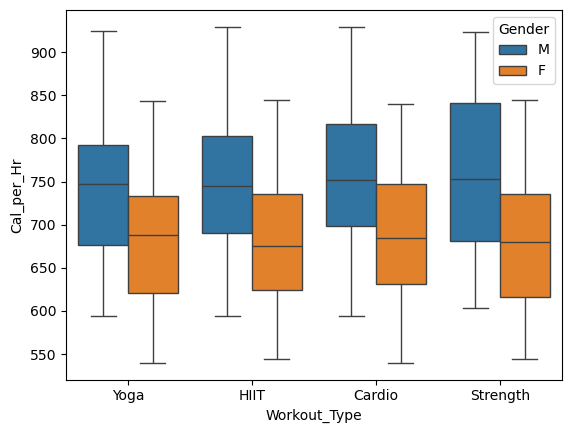

In [49]:
sns.boxplot(x= df.Workout_Type, y=df.Cal_per_Hr, hue=df.Gender)

<Axes: xlabel='Workout_Type', ylabel='Cal_per_Hr'>

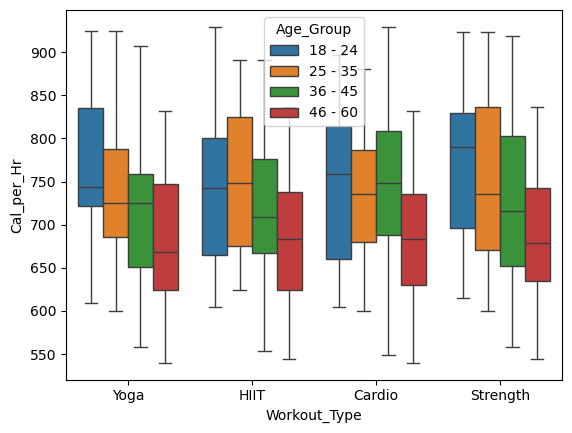

In [50]:
sns.boxplot(x= df.Workout_Type, y=df.Cal_per_Hr, hue=df.Age_Group)

### Calories per hour reduces the outliers showing the trend to reduced calories burned per hour as they age
### HIIT for the 25 - 35 age group seems to be at odds but they maybe pushing harder

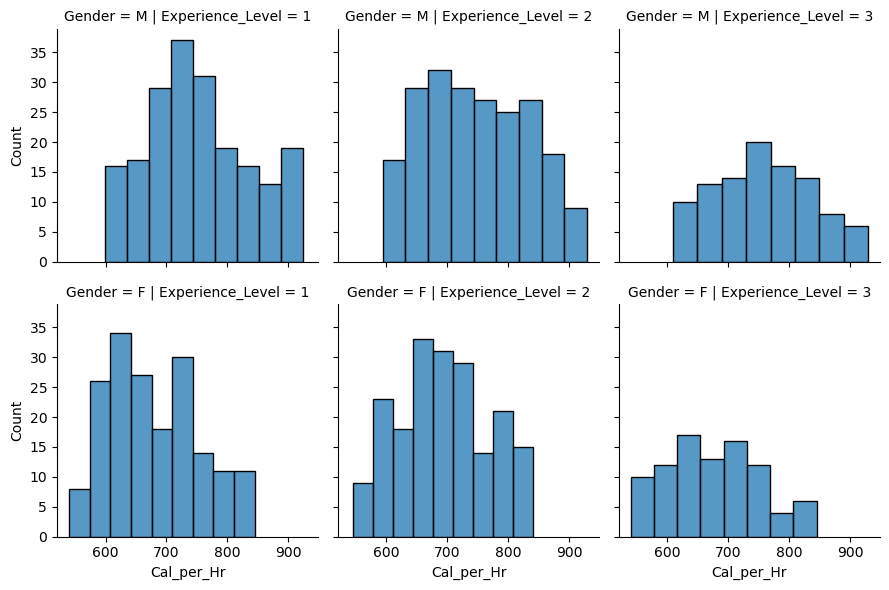

In [51]:
ge = sns.FacetGrid(df, row='Gender', col='Experience_Level')
ge.map_dataframe(sns.histplot, x='Cal_per_Hr')

<Axes: xlabel='Workout_Type', ylabel='Cal_per_Hr'>

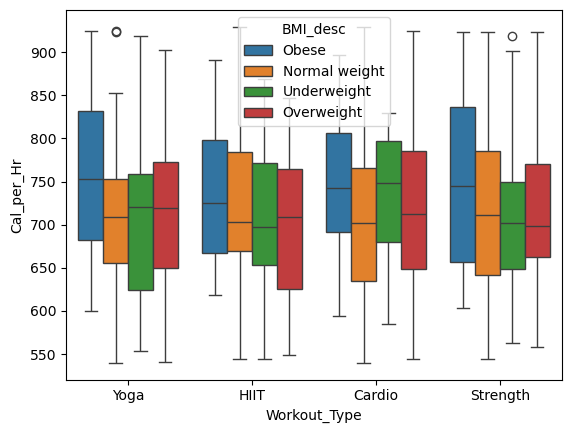

In [52]:
sns.boxplot(x= df.Workout_Type, y=df.Cal_per_Hr, hue=df.BMI_desc)

<Axes: xlabel='Avg_Workout_Zone', ylabel='Cal_per_Hr'>

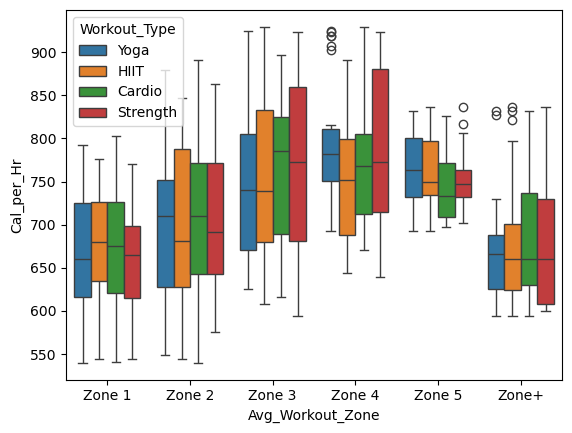

In [53]:
sns.boxplot(x= df.Avg_Workout_Zone, y=df.Cal_per_Hr, hue=df.Workout_Type, order=sorted_zones)

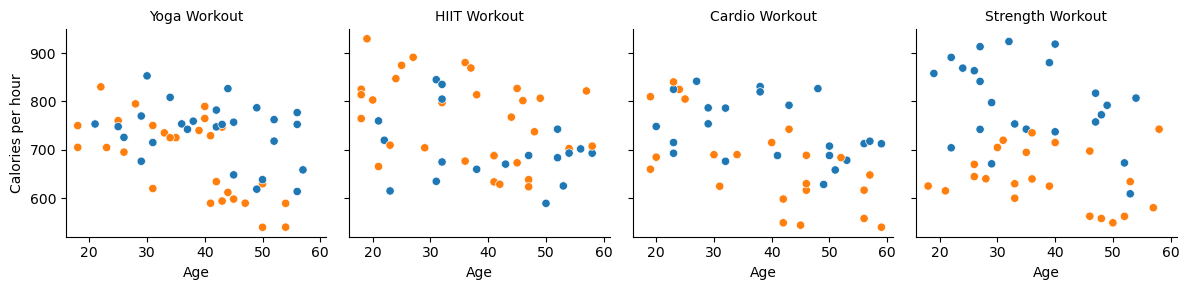

In [54]:
df3 = df[df['Experience_Level'] == 3]

w = sns.FacetGrid(df3, col='Workout_Type')
w.map_dataframe(sns.scatterplot, x='Age', y='Cal_per_Hr', hue='Gender')
w.set_axis_labels('Age', 'Calories per hour')
w.set_titles(col_template= '{col_name} Workout')

### In viewing the strength grid it looks like males push harder than females when working out, the others seemed more mixed
What is the collection mechanism for the calories burned?

<Axes: xlabel='Age_Group', ylabel='Session_Duration (hours)'>

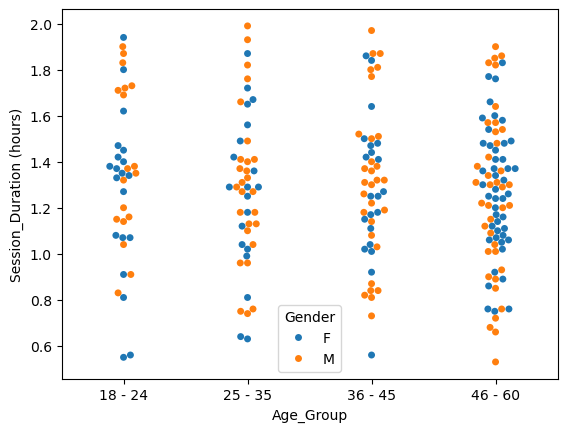

In [55]:
sns.swarmplot(y = 'Session_Duration (hours)', x = 'Age_Group', data=df[df.Workout_Type == 'HIIT'], hue='Gender')

<Axes: xlabel='Age_Group', ylabel='Session_Duration (hours)'>

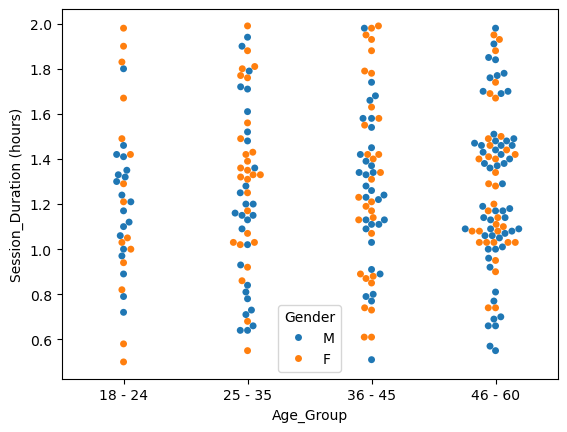

In [56]:
sns.swarmplot(y = 'Session_Duration (hours)', x = 'Age_Group', data=df[df.Workout_Type == 'Yoga'], hue='Gender')

<Axes: xlabel='Age_Group', ylabel='Session_Duration (hours)'>

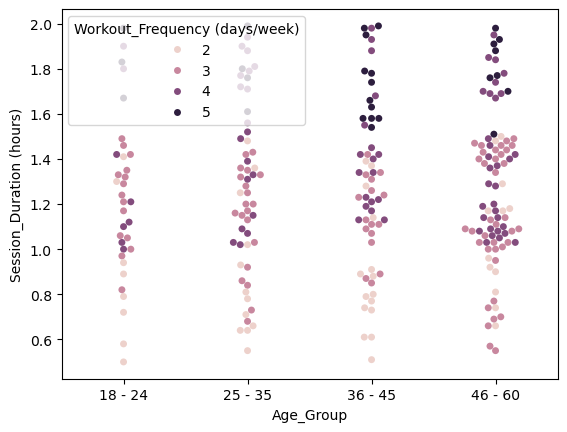

In [57]:
sns.swarmplot(y = 'Session_Duration (hours)', x = 'Age_Group', data=df[df.Workout_Type == 'Yoga'], hue='Workout_Frequency (days/week)')